In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mother.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


<AxesSubplot: xlabel='RiskLevel', ylabel='count'>

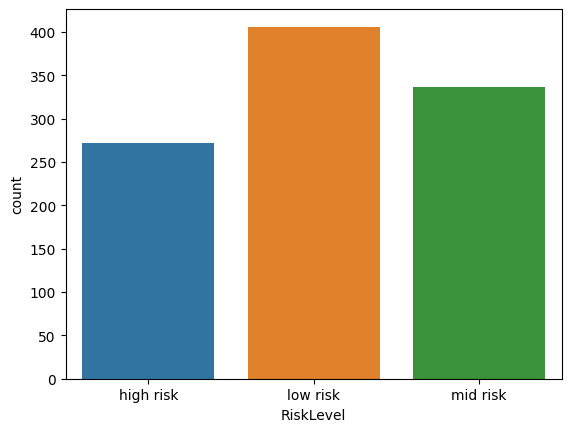

In [8]:
sns.countplot(x = 'RiskLevel', data = df)

In [9]:
df['RiskLevel'] = df['RiskLevel'].replace('high risk', 1)

In [10]:
df['RiskLevel'] = df['RiskLevel'].replace('mid risk', 1)

In [11]:
df['RiskLevel'] = df['RiskLevel'].replace('low risk', 0)

In [12]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [13]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.182170
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.325681
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.231160
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.373772
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.176538
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.154731
RiskLevel,0.182170,0.325681,0.231160,0.373772,0.176538,0.154731,1.000000


In [14]:
df.corr()['RiskLevel'].sort_values()

HeartRate      0.154731
BodyTemp       0.176538
Age            0.182170
DiastolicBP    0.231160
SystolicBP     0.325681
BS             0.373772
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

<AxesSubplot: >

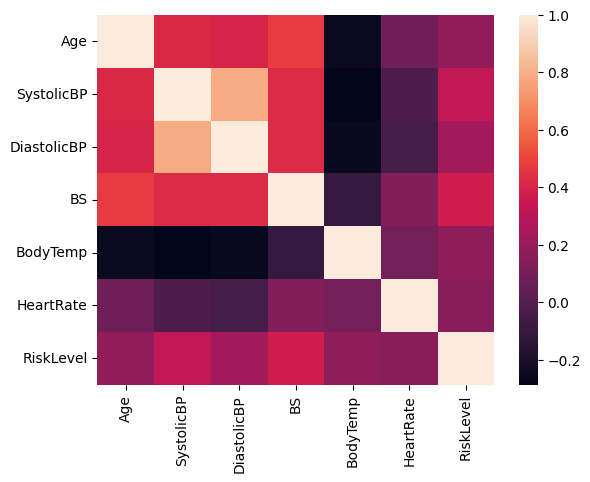

In [15]:
sns.heatmap(df.corr())

In [16]:
X = df.drop('RiskLevel', axis = 1).values
y = df['RiskLevel'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler()

In [21]:
X_train = sc.fit_transform(X_train)

In [22]:
X_test = sc.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
X_train.shape

(679, 6)

In [25]:
X_test.shape

(335, 6)

In [26]:
y_train.shape

(679,)

In [27]:
y_test.shape

(335,)

In [28]:
model = Sequential()
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x= X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
22/22 [==============================] - 1s 16ms/step - loss: 0.7060 - val_loss: 0.7029
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6975 - val_loss: 0.6932
Epoch 3/200
22/22 [==============================] - 0s 6ms/step - loss: 0.6912 - val_loss: 0.6880
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6883 - val_loss: 0.6860
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6870 - val_loss: 0.6845
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6860 - val_loss: 0.6829
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6850 - val_loss: 0.6817
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6841 - val_loss: 0.6803
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6831 - val_loss: 0.6787
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6821 - val_loss: 0.6774
Epoch 11

22/22 [==============================] - 0s 3ms/step - loss: 0.5349 - val_loss: 0.5304
Epoch 84/200
22/22 [==============================] - 0s 3ms/step - loss: 0.5341 - val_loss: 0.5283
Epoch 85/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5336 - val_loss: 0.5279
Epoch 86/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5332 - val_loss: 0.5263
Epoch 87/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5338 - val_loss: 0.5280
Epoch 88/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5316 - val_loss: 0.5250
Epoch 89/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5315 - val_loss: 0.5253
Epoch 90/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5307 - val_loss: 0.5249
Epoch 91/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5305 - val_loss: 0.5243
Epoch 92/200
22/22 [==============================] - 0s 3ms/step - loss: 0.5297 - val_loss: 0.5238
Epoch 93/200


22/22 [==============================] - 0s 5ms/step - loss: 0.5082 - val_loss: 0.5099
Epoch 165/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5084 - val_loss: 0.5063
Epoch 166/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5076 - val_loss: 0.5078
Epoch 167/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5077 - val_loss: 0.5083
Epoch 168/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5073 - val_loss: 0.5082
Epoch 169/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5070 - val_loss: 0.5059
Epoch 170/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 0.5055
Epoch 171/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 0.5059
Epoch 172/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 0.5043
Epoch 173/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 0.5046
Epoc

In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

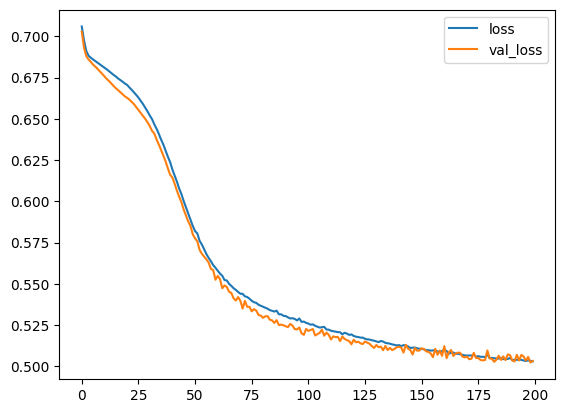

In [31]:
losses.plot()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

11/11 [==============================] - 0s 3ms/step


In [34]:
confusion_matrix(y_test, y_pred)

array([[ 97,  31],
       [ 62, 145]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68       128
           1       0.82      0.70      0.76       207

    accuracy                           0.72       335
   macro avg       0.72      0.73      0.72       335
weighted avg       0.74      0.72      0.73       335



In [66]:
mh = [[30,130,90,6.8,98.0,78]]

In [67]:
mh = sc.transform(mh)

In [68]:
model.predict(mh)

1/1 [==============================] - 0s 30ms/step


array([[0.51824665]], dtype=float32)